In [1]:
import numpy as num
import pandas as pan
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#Create a dataframe using Pandas read_csv()
urm = pan.read_csv('C:/Users/brent/Downloads/Unreinforced_Masonry_Buildings.csv') 

In [3]:
urm.head(35) #Let's take a flying look at the top 35 lines in the dataset.

,Preliminary Risk Category,Neighborhood,Address,Year Built,No. Stories,Retrofit Level,Building Use,Estimated Number of Occupants,Confirmation Source
0,Medium Risk,Pioneer Square/Chinatown International District,1 Yesler Way,1911,3,Permitted Retrofit,Commercial/Office,11-100,Google Street View
1,High Risk,Pioneer Square/Chinatown International District,100 6th Ave S,1903,5,Visible retrofit,Residential,11-100,Photos from Previous Surveys
2,High Risk,Duwamish/SODO,100 S King St,1907,6,Permitted Retrofit,Commercial/Office,101+,Field Visit
3,Medium Risk,Queen Anne,100 W Highland Dr,1921,4,No visible retrofit,Residential,101+,Google Street View
4,High Risk,Queen Anne,100 W Roy St,1912,3,Visible retrofit,Public Assembly,101+,Permit Drawing Review
5,High Risk,Duwamish/SODO,1000 1st Ave S,1910,6,Substantial Alteration,Commercial/Office,101+,Google Street View
6,Medium Risk,First Hill,1000 Madison St,1930,2,No visible retrofit,Commercial,11-100,Field Visit
7,Medium Risk,Miller Park,1000 Turner Way E,1910,1,No visible retrofit,Office,11-100,Google Street View
8,Medium Risk,Pioneer Square/Chinatown International District,1001 S Jackson St,1915,1,Permitted Retrofit,Commercial,11-100,Google Street View
9,Critical Risk,Capitol Hill,1002 E Seneca St,1922,1,Substantial Alteration,Schools,101+,Photos from Previous Surveys


In [ ]:
#Browsing the data, we can see that there are 3 risk categories: 'Medium' risk, 'High' risk, and 'Critical' risk. There are multiple 'Building Use' categories including Commercial, Residential, Public Assembly, Office buildings, and Schools. Within our sample, note that all of the 'Critical' buildings are schools, and vice versa.

In [4]:
#Checking out the list of categories each building can fall into:
urm['Building Use'].value_counts()

Commercial                341
Residential               185
Commercial/Residential    144
Commercial/Office         138
Public Assembly           123
Schools                    75
Office                     59
Other Mixed Uses           28
Government                 27
Industrial                 25
Vacant                      5
Emergency                   1
Name: Building Use, dtype: int64

In [5]:
#Taking a closer look at those schools, to see if they have some special risk 
urm.loc[(urm['Building Use']=='Schools'), ["Preliminary Risk Category", "Building Use", "Retrofit Level"]]

,Preliminary Risk Category,Building Use,Retrofit Level
9,Critical Risk,Schools,Substantial Alteration
16,Critical Risk,Schools,Permitted Retrofit
30,Critical Risk,Schools,Permitted Retrofit
47,Critical Risk,Schools,Permitted Retrofit
71,Critical Risk,Schools,No visible retrofit
102,Critical Risk,Schools,Permitted Retrofit
103,Critical Risk,Schools,Substantial Alteration
136,Critical Risk,Schools,Substantial Alteration
177,Critical Risk,Schools,Permitted Retrofit
179,Critical Risk,Schools,No visible retrofit


In [6]:
#Sure looks like all the schools are considered 'Critical Risk'. To make sure, we'll check for schools that are not 'Critical':
urm.loc[(urm['Preliminary Risk Category']!='Critical Risk') & (urm['Building Use']=='Schools'), ["Preliminary Risk Category", "Building Use"]]

,Preliminary Risk Category,Building Use


In [7]:
#None. We have now established not only that all schools are considered 'Critical Risk', but that the designation is applied regardless of the retrofits or alterations to the building. It's beginning to look like schools are sui generis in the eyes of Seattle's city hall. The final step in demonstrating this is to ask: are schools also the only 'Critical Risk' buildings? 
urm.loc[(urm['Preliminary Risk Category']=='Critical Risk') & (urm['Building Use']!='Schools'), ["Preliminary Risk Category", "Building Use"]]

,Preliminary Risk Category,Building Use
276,Critical Risk,Emergency


In [ ]:
#So we've found that all schools are considered 'Critical Risk', and with one exception, all 'Critical Risk' buildings are schools - a near-perfect correlation. Of course, correlation does not imply causation, but in this case common sense suggests that the govenrment wishes to maintain at least the appearance of extra vigilance towards the safety of school buildings. No parent wants to think that their child's school may come down in an earthquake and that the government doesn't take the problem seriously.

#However, this approach renders the 'Critical Risk' designation redundant and meaningless - all it really tells us is that the building in question is a school, or that lone 'Emergency' building. Since the 'Critical Risk' designation is used for all schools, it should be possible to evaluate the set of schools using the same criteria applied to other buildings, and thus arrive at a more objective and less politically-motivated risk assessment.

#In the lingo of data science, this is the "supervised learning problem", which we can attack by using the data on non-school buildings to train a model to assess the relative risk an earthquake would pose to each school.

In [8]:
#Before moving on, let's re-organize our dataframe to generalize what we did for schools: For each building use class, get the value count of the buildings in each risk category. Then we can build a new table with risk categories for columns, and building uses for rows. Since this operation may be generally useful, I'll declare a function that can do it with any 2 columns:  

def value_count_table (data, index_col, data_col): #Given a dataframe and 2 column names (strings), returns a table with rows labeled according to each unique value appearing in index_col and columns labeled by unique values in data_col. Each cell contains the number of times a given value of data_col appears in conjunction with a given value for index_col in the original dataset.

  row_dict = data[index_col].value_counts() #returns a dict with index_col categories as keys
  col_dict = data[data_col].value_counts() #same for data_col entries

  output_cols = [index_col] #set the left-most output column name to be the index column name

  for n in range(len(col_dict.keys())): #shoehorn the object returned by keys() into the column list for the output dataframe
    output_cols.append(col_dict.keys()[n])  

  output = pan.DataFrame(columns = output_cols, index = range(len(row_dict.keys()))) #Create a dataframe w/ NaN to hold results

  for n in range(len(row_dict.keys())): #Loop over the set of rows
    
    sub_frame = data.loc[(data[index_col] == row_dict.keys()[n]), [index_col, data_col]] #For each row, create a temporary frame
   
    counts = sub_frame[data_col].value_counts()  #Get value counts from the new frame and assign the output to a new dict
    
    count_dict = {index_col:row_dict.keys()[n]} #Build a dictionary with the category name
  
    count_dict.update(dict(counts)) #Add the dictionary of risk category counts to count_dict
  
    output.loc[n] = count_dict #Write in count_dict as a row in the new datframe

  output.fillna(0, inplace = True)
  return(output)

In [9]:
value_count_table(urm, 'Building Use', 'Preliminary Risk Category')

,Building Use,Medium Risk,High Risk,Critical Risk
0,Commercial,332,9,0
1,Residential,171,14,0
2,Commercial/Residential,129,15,0
3,Commercial/Office,108,30,0
4,Public Assembly,17,106,0
5,Schools,0,0,75
6,Office,56,3,0
7,Other Mixed Uses,24,4,0
8,Government,26,1,0
9,Industrial,24,1,0


In [ ]:
#As we have already seen, the emergency building and schools are the only ones designated 'Critical', and vice versa. However, something appears to be going on with the 'Public Assembly' buildings-they're the only category where the number of 'High Risk' buildings is much greater than 'Medium Risk'. I suspect that politics has informed this judgement as well. To stick to objective criteria, I think 'Public Assembly' buidings should also be excluded from the set of training data.

In [10]:
#Before we construct a model, we should check for gaps in the dataset
def num_missing(x):        #Define a new function num_missing() to check for null cells
  return sum(x.isnull())

print ("Missing values per column:")
print (urm.apply(num_missing, axis=0)) #use function apply() to run num_zero() on each column

Missing values per column:
Preliminary Risk Category        0
Neighborhood                     0
Address                          0
Year Built                       0
No. Stories                      0
Retrofit Level                   0
Building Use                     0
Estimated Number of Occupants    4
Confirmation Source              5
dtype: int64


In [ ]:
#There are a few holes to patch, but overall, the data set is pretty complete.

In [11]:
#Get the Distribution of counts for the various occupancy estimates
urm['Estimated Number of Occupants'].value_counts()

11-100    604
101+      477
1-10       66
Name: Estimated Number of Occupants, dtype: int64

In [12]:
#As a quick fix, let's  just fill in the missing values in this category with the most common entry: 11-100
urm['Estimated Number of Occupants'].fillna('11-100', inplace=True)

In [13]:
#Get the category distribution of sources
urm['Confirmation Source'].value_counts()

Google Street View                          534
Field Visit                                 266
Permit Drawing Review                       164
Photos from Previous Surveys                 98
Sandborn Insurance Maps                      37
Google Street View-Rosettes                  20
White Card Permit Records                    10
University of Washington Facilities List      6
Department of Neighborhoods                   4
Previous Seismic Reports                      3
Photos (Rosettes) from Previous Surveys       2
History Link                                  1
University of Washington Daily--Online        1
Name: Confirmation Source, dtype: int64

In [14]:
#Again, we'll use the quick-and dirty munging approach - replace missing values in this category with 'Google Street View'
urm['Confirmation Source'].fillna('Google Street View', inplace=True)

In [15]:
#We should now have a hole-free dataset
def num_missing(x):        #Define a new function num_missing() to check for null cells
  return sum(x.isnull())

print ("Missing values per column:")
print (urm.apply(num_missing, axis=0)) #use function apply() to run num_zero() on each column

Missing values per column:
Preliminary Risk Category        0
Neighborhood                     0
Address                          0
Year Built                       0
No. Stories                      0
Retrofit Level                   0
Building Use                     0
Estimated Number of Occupants    0
Confirmation Source              0
dtype: int64


In [16]:
urm.describe() #Description of numerical data. 

,Year Built,No. Stories
count,1151.000000,1151.000000
mean,1900.642919,2.506516
std,178.409817,1.514481
min,0.000000,1.000000
25%,1908.000000,1.000000
50%,1919.000000,2.000000
75%,1926.000000,3.000000
max,1957.000000,10.000000


In [ ]:
#There are 1151 buildings covered in each column. But there is another notieceable flaw in the data set - namely, the 'Year Built' category has a nonsensical minimum value of 0. Presumably that's what was entered in lieu of a null cell when accurate records were unavailable.

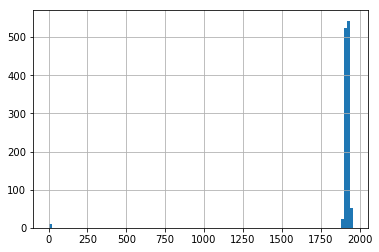

In [17]:
#Let's look at the distribution just to be sure.
urm['Year Built'].hist(bins=100) 

In [ ]:
#As suspected, the history of brick buildings in Seattle doesn't really stretch back 2000 years. The only outlying values are 0s.

In [18]:
#Let's count the number of zero entries in the 'Year Built' column. 
def num_zero(x):      #Define a new function num_zero() that sums the results of
    return sum(x==0)  #comparison statements between dataframe entries and zero

print ("values per column:") 
print (urm.apply(num_zero, axis=0)) #use function apply() to run num_zero() on each col. (axis=1 would run num_zero on each row)

values per column:
Preliminary Risk Category         0
Neighborhood                      0
Address                           0
Year Built                       10
No. Stories                       0
Retrofit Level                    0
Building Use                      0
Estimated Number of Occupants     0
Confirmation Source               0
dtype: int64


In [ ]:
#It seems we have 10 buldings with 0 for construction dates. 1151 total buildings implies 1141 have valid dates. Let's take theaverage value of the years these other buildings were built, round it off, and impute that to the missing entries.

In [19]:
urm['Year Built'].sum()/1141.0

1917.3006134969326

In [ ]:
#1917 seems like a reasonable year. Let's go with that.

In [20]:
#Replace 0 with 1917 in column 'Year Built'
urm['Year Built'].replace(0, 1917, inplace=True)

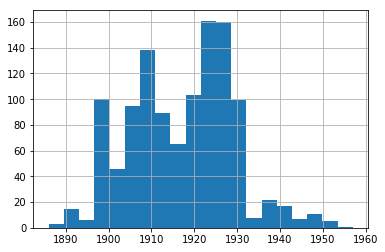

In [21]:
#Check the distribution to see if things make more sense now
urm['Year Built'].hist(bins=20) 

In [ ]:
#You can almost see a couple boom-and-bust construction cycles in the distribution, which is interesting in it's own right.

In [22]:
#Let's look at the distribution of building heights to check for outliers or nonsense values
urm['No. Stories'].value_counts() 

1     382
2     280
3     214
4     156
5      63
6      35
7      18
8       2
10      1
Name: No. Stories, dtype: int64

In [ ]:
#Nothing really unexpected here, though I'm surprised someone managed to erect a 10-story building without even using rebar.

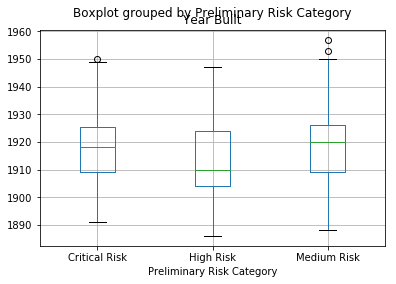

In [23]:
#Let's look at the building heights by risk category with a simple box plot, just for fun:
urm.boxplot(column='Year Built', by = "Preliminary Risk Category")

In [ ]:
#Bearing in mind that the 'Critical Risk' category isn't really meaningful, it would seem that taller buildings are more risky, on the whole. This makes intuitive sense.

In [ ]:
#With no continuous variables, the algorithm of choice should be suitable for classification problems. There is an intuitive hierarchy when it comes to the relevance ot the set of variables - for instance, we would expect that the retrofit status is far more important to the risk level of a building than which neighborhood it's in. It looks like the problem calls for a decision tree algorithm, which will be implemented below.

In [24]:
#Now we need to separate the single dataframe urm into two: one frame with no schools for training the model, the other frame with all schools which will be used to make predictions. Start by checking the risk categories for the existing dataframe
urm['Preliminary Risk Category'].value_counts()

Medium Risk      892
High Risk        183
Critical Risk     76
Name: Preliminary Risk Category, dtype: int64

In [25]:
#Define the training data set as the set of buildings that don't correspond to 'Critical Risk' 
train_data = urm[urm['Building Use']  != 'Schools']
train_data = train_data[train_data['Building Use'] != 'Emergency']

#Get rid of the 'Public Assembly' buildings as well, on account of the anomalous ratio of medium/high risk buildings
train_data = train_data[train_data['Building Use'] != 'Public Assembly']

#Check to see if the separation is complete-should be no more 'Critical Risk' entries
train_data['Preliminary Risk Category'].value_counts()

Medium Risk    875
High Risk       77
Name: Preliminary Risk Category, dtype: int64

In [26]:
#Since sklearn requires all inputs to be numeric, we should convert the categorical variable 'Retrofit Status' to numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder

columns = ['Preliminary Risk Category','Neighborhood', 'Address', 'Building Use', 'Retrofit Level','Estimated Number of Occupants','Confirmation Source']

#LabelEncoder() takes a list of variable names (i.e. columns) as input, returns a dataframe where each category in a given column has been converted to an integer
le = LabelEncoder()
for i in columns:
  train_data[i] = le.fit_transform(train_data[i]) #reassign each column to the result of LabelEncoder()

In [27]:
#Check to see that relevant data columns are numeric values
urm.dtypes 

Preliminary Risk Category        object
Neighborhood                     object
Address                          object
Year Built                        int64
No. Stories                       int64
Retrofit Level                   object
Building Use                     object
Estimated Number of Occupants    object
Confirmation Source              object
dtype: object

In [28]:
#Import models from scikit learn module:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import cross-validation tools
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold 
from sklearn import metrics

C:\Users\brent\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
#This is the function that will be used to train the model on the buildings in train_data. Given a model type and a set of predictor variables, we will do the fitting and compare the model's output to the list of results, then use 5-fold cross validation to see if the model generalizes well.
def learn (model, predictor_vars):

  model.fit(train_data[predictor_vars], train_data['Preliminary Risk Category'])

  predictions = model.predict(train_data[predictor_vars])

  accuracy = metrics.accuracy_score(predictions,train_data['Preliminary Risk Category'])
  
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

#5-fold cross-validation: Iterate the training/testing proceedure 5 times, withholding 1/5th of the dataset each time and training the model on the remainder. Then apply the model to the excluded data and average the errors from each iteration for the 'cross-validation score'
  error = []
  kf = KFold(train_data.shape[0], n_folds=5)
  
  for train, test in kf:
    predictor_slice = (train_data[predictor_vars].iloc[train,:]) #Take a slice from the training dataframe
  
    model.fit(predictor_slice, train_data['Preliminary Risk Category'].iloc[train]) #Perform fit

    error.append(model.score(train_data[predictor_vars].iloc[test,:], train_data['Preliminary Risk Category'].iloc[test]))  
  
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(num.mean(error))) #Average the error scores from each slice

In [30]:
#Try a single decision tree for starters, with just 3 predictor variables
tree_model = DecisionTreeClassifier()
input_vars = ['Retrofit Level', 'Neighborhood', 'Year Built']
learn(tree_model, input_vars)

Accuracy : 96.744%
Cross-Validation Score : 88.134%


In [31]:
#The single tree does a fairly good job reproducing results of the full training dataset, but the model appears to overfit-the lower cross-validation score shows that the model yields poorer predictions when applied to data it was not trained on. Let's try a different set of input variables:
input_vars = ['Retrofit Level', 'No. Stories', 'Year Built']
learn(tree_model, input_vars)

Accuracy : 97.374%
Cross-Validation Score : 91.076%


In [32]:
#A slight improvement. Try the whole set of predictors:
input_vars = ['Retrofit Level', 'Neighborhood', 'No. Stories', 'Year Built', 'Estimated Number of Occupants', 'Confirmation Source']
learn(tree_model, input_vars)

Accuracy : 99.895%
Cross-Validation Score : 92.233%


In [33]:
#So the decision tree appears to improve with more information. It still seems like we can do better, perhaps by using a random forest method:  
RF_model = RandomForestClassifier()
input_vars = ['Retrofit Level', 'Neighborhood', 'No. Stories',  'Year Built', 'Estimated Number of Occupants', 'Confirmation Source']
learn(RF_model, input_vars)

Accuracy : 99.580%
Cross-Validation Score : 93.592%


In [37]:
#separate the schools from the original dataframe
school_data = urm[urm['Building Use'] == 'Schools']
input_data = school_data[:] #copy dataframe w/slice notation so that we can overwrite entries with numeric values

columns = ['Preliminary Risk Category','Neighborhood', 'Address', 'Building Use', 'Retrofit Level','Estimated Number of Occupants','Confirmation Source']

#encode the values of input_data for input to the model
le = LabelEncoder()
for i in columns:
  input_data[i] = le.fit_transform(school_data[i]) #reassign each column to the result of LabelEncoder()

#set the predictors and run the random forest model on both the training dataframe and the school dataframe
RF_model = RandomForestClassifier()
input_vars = ['Retrofit Level', 'Neighborhood', 'No. Stories', 'Year Built', 'Estimated Number of Occupants', 'Confirmation Source']
learn(RF_model, input_vars)

predictions = RF_model.predict(input_data[input_vars])

Accuracy : 99.790%
Cross-Validation Score : 94.015%


In [38]:
x = 0
for y in school_data.index.values: #index values are retained from the original dataframe -> can't loop on range(len(...))
  if predictions[x] == 0:
    school_data.set_value(y, 'Preliminary Risk Category', 'High Risk')
  if predictions[x] == 1:
    school_data.set_value(y, 'Preliminary Risk Category', 'Medium Risk')
  x += 1

In [50]:
#Now that the model has made its predictions, let's look at the highest-rish school buildings:
school_data.loc[(school_data['Preliminary Risk Category']=='High Risk'), ['Preliminary Risk Category','Neighborhood', 'Address',  'Year Built', 'No. Stories', 'Retrofit Level', 'Building Use', 'Estimated Number of Occupants','Confirmation Source']]

,Preliminary Risk Category,Neighborhood,Address,Year Built,No. Stories,Retrofit Level,Building Use,Estimated Number of Occupants,Confirmation Source
376,High Risk,Univ Dist,2103 NE Skagit Ln,1896,4,Substantial Alteration,Schools,101+,Permit Drawing Review
605,High Risk,Queen Anne,3307 3rd Ave W,1891,4,Substantial Alteration,Schools,101+,Google Street View
676,High Risk,Univ Dist,4182 E Stevens Way NE,1896,4,Permitted Retrofit,Schools,101+,Permit Drawing Review
756,High Risk,Wallingford,4649 Sunnyside Ave N,1906,5,Permitted Retrofit,Schools,101+,Permit Drawing Review


In [40]:
#One thing that stands out immediately is that all of the high-risk schools have permitted retrofits or 'substantial alterations'. This is somewhat surprising, given that reinforcements should lower the risk of any given building. Of course, it's possible that schools were made a priority and are nearly all reinforced. Let's check the distribution:
school_data['Retrofit Level'].value_counts()

Permitted Retrofit        42
Substantial Alteration    16
No visible retrofit       14
Visible retrofit           3
Name: Retrofit Level, dtype: int64

In [44]:
#While most schools have some kind of retrofit (in contrast to the set of all URM buildings), it appears that some don't. Instead, the retrofit status doesn't seem to have much to do with the risk level. However, one thing the high-risk schools have in common is height; all are 4 stories or more. Let's pull out a crosstab to see how the number of stories relates to the model's risk results: 
pan.crosstab([school_data['No. Stories'], school_data['Retrofit Level']], school_data['Preliminary Risk Category'], margins=True)

Preliminary Risk Category           High Risk  Medium Risk  All
No. Stories Retrofit Level                                     
1           No visible retrofit             0            3    3
            Permitted Retrofit              0            5    5
            Substantial Alteration          0            6    6
            Visible retrofit                0            1    1
2           No visible retrofit             0            5    5
            Permitted Retrofit              0           10   10
            Substantial Alteration          0            2    2
3           No visible retrofit             0            5    5
            Permitted Retrofit              0           19   19
            Substantial Alteration          0            5    5
            Visible retrofit                0            2    2
4           No visible retrofit             0            1    1
            Permitted Retrofit              1            6    7
            Substantial Alteration          2            1    3
5           Permitted Retrofit              1            0    1
All                                         4           71   75

In [46]:
#So all the high-risk school buildings are literally the highest school buildings. It's looking more like the high-risk buildings have retrofitted, rather than the un-retrofitted buildings being designated as high-risk.

In [61]:
#To finish up, let's create a list of URM schools with more nuanced risk assessment by re-running the model on the school input data, outputting the probablilty that each building falls into the 'high-risk' category.
predictions = RF_model.predict_proba(input_data[input_vars])

x = 0
for y in school_data.index.values: #index values are retained from the original dataframe -> can't loop on range(len(...))
  school_data.set_value(y, 'Preliminary Risk Category', predictions[x][0])
  x += 1

#We'll make a special dataset for buildings with nonzero probability of a high-risk classisfication
high_risk = school_data.loc[(school_data['Preliminary Risk Category'] > 0), ['Preliminary Risk Category','Neighborhood', 'Address',  'Year Built', 'No. Stories', 'Retrofit Level', 'Building Use', 'Estimated Number of Occupants','Confirmation Source']]

In [62]:
#Finally, let's sort the high-risk probablility values to come up with a ranking system-everyone likes rankings.
high_risk.sort_values('Preliminary Risk Category', ascending = False)

,Preliminary Risk Category,Neighborhood,Address,Year Built,No. Stories,Retrofit Level,Building Use,Estimated Number of Occupants,Confirmation Source
376,0.9,Univ Dist,2103 NE Skagit Ln,1896,4,Substantial Alteration,Schools,101+,Permit Drawing Review
676,0.7,Univ Dist,4182 E Stevens Way NE,1896,4,Permitted Retrofit,Schools,101+,Permit Drawing Review
756,0.7,Wallingford,4649 Sunnyside Ave N,1906,5,Permitted Retrofit,Schools,101+,Permit Drawing Review
605,0.6,Queen Anne,3307 3rd Ave W,1891,4,Substantial Alteration,Schools,101+,Google Street View
655,0.4,Univ Dist,4105 Memorial Way NE,1902,4,Permitted Retrofit,Schools,101+,University of Washington Daily--Online
1022,0.3,Miller Park,728 21st Ave E,1908,4,Permitted Retrofit,Schools,101+,Permit Drawing Review
1129,0.3,First Hill,916 Broadway,1894,4,Permitted Retrofit,Schools,101+,Field Visit
30,0.2,Duwamish/SODO,1022 1st Ave S,1909,4,Permitted Retrofit,Schools,11-100,Google Street View
358,0.2,Univ Dist,2034 NE Skagit Ln,1948,4,No visible retrofit,Schools,101+,University of Washington Facilities List


In [ ]:
#Again, it seems that building height is the most important factor in the risk assessment-all the riskiest buildings are 4 stories or more (remember the tallest school is 5 stories). Another important risk factor appears to be age; 8 of 9 buildings on the list are more than 100 years old. Retrofit status is a secondary concern, as shown by the difference in the top two buildings: both are 4 story buildings on the UW campus, and both date to 1896. The riskiest building according to the model is Clark Hall, home to Washington's ROTC program, which has only a 'substantial alteration', while the neighboring Communications dept. building has a permitted retrofit on file with the city.